# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Mikail Ziyad]
- **Email:** [m299b4ky2941@bangkit.academy]
- **ID Dicoding:** [mikailyad]

## Menentukan Pertanyaan Bisnis

- Seberapa baik kinerja pendaftar dalam beberapa bulan terakhir dilihat dari jumlah peminjaman sepeda?
- Bagaimana pengaruh musim terhadap frekuensi peminjaman sepeda? Apakah ada musim tertentu yang menunjukkan fluktuasi signifikan, baik peningkatan maupun penurunan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Cleaning Data

In [9]:
day_df = day_df.drop(columns=["instant", "dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [10]:
category_columns = ['season', 'weathersit', 'holiday', 'mnth', 'workingday', 'weekday']

for column in category_columns:
  day_df[column] = day_df[column].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    int64   
 2   mnth        731 non-null    category
 3   holiday     731 non-null    category
 4   weekday     731 non-null    category
 5   workingday  731 non-null    category
 6   weathersit  731 non-null    category
 7   temp        731 non-null    float64 
 8   atemp       731 non-null    float64 
 9   hum         731 non-null    float64 
 10  windspeed   731 non-null    float64 
 11  casual      731 non-null    int64   
 12  registered  731 non-null    int64   
 13  cnt         731 non-null    int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 51.4 KB


In [20]:
if day_df['mnth'].dtype.name == 'category':
    day_df['mnth'] = day_df['mnth'].cat.rename_categories({
        1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
        5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
        9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
    })
else:
    day_df['mnth'] = day_df['mnth'].replace(
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
    )

day_df['mnth'].value_counts()

,count
mnth,
Januari,62
Maret,62
Mei,62
Juli,62
Agustus,62
Oktober,62
Desember,62
April,60
Juni,60


In [19]:
day_df['yr'] = day_df['yr'].replace([0, 1], ['2011', '2012'])

# Check value counts
day_df['yr'].value_counts()

,count
yr,
2012,366
2011,365


## Exploratory Data Analysis (EDA)

### Explore Data

In [21]:
day_df.groupby(['mnth', 'yr'], observed=False)['cnt'].sum().unstack(fill_value=0)

yr,2011,2012
mnth,,
Januari,38189,96744
Februari,48215,103137
Maret,64045,164875
April,94870,174224
Mei,135821,195865
Juni,143512,202830
Juli,141341,203607
Agustus,136691,214503
september,127418,218573


In [22]:
day_df.groupby('season', observed=False)['cnt'].mean().reset_index()

,season,cnt
0,Spring,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


## Visualization & Explanatory Analysis

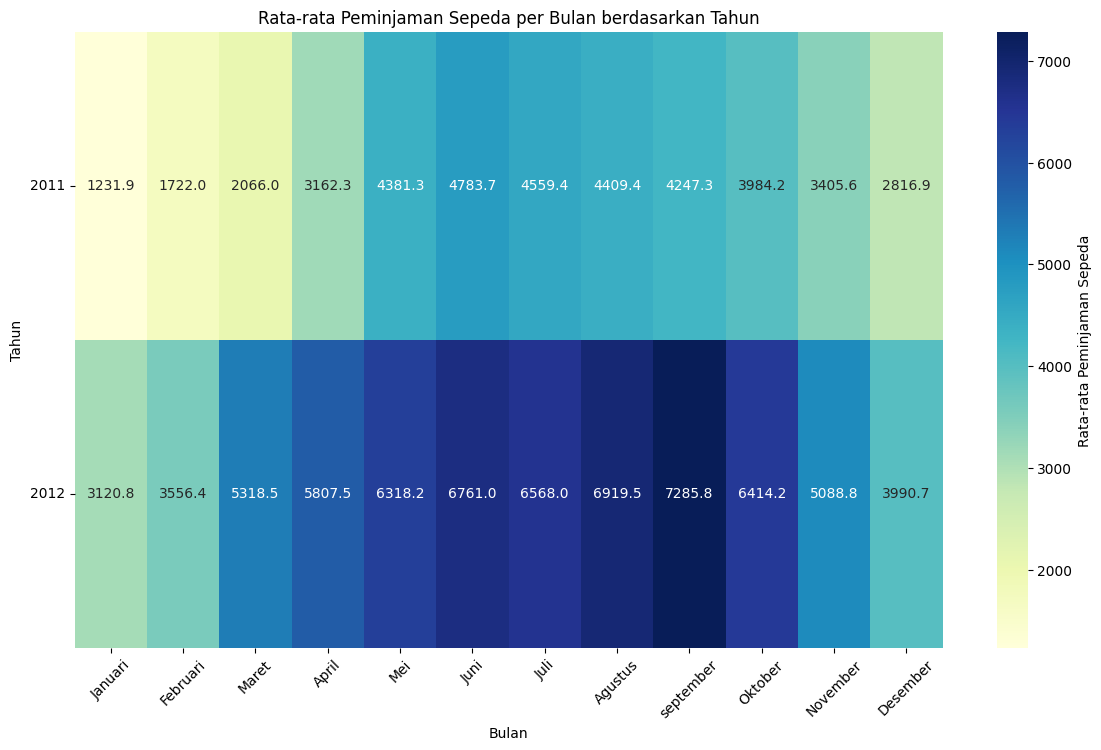

In [42]:
heatmap_data = day_df.pivot_table(values='cnt', index='yr', columns='mnth', aggfunc='mean', observed=False)

plt.figure(figsize=(14, 8))
sn.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Rata-rata Peminjaman Sepeda'})
plt.title('Rata-rata Peminjaman Sepeda per Bulan berdasarkan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

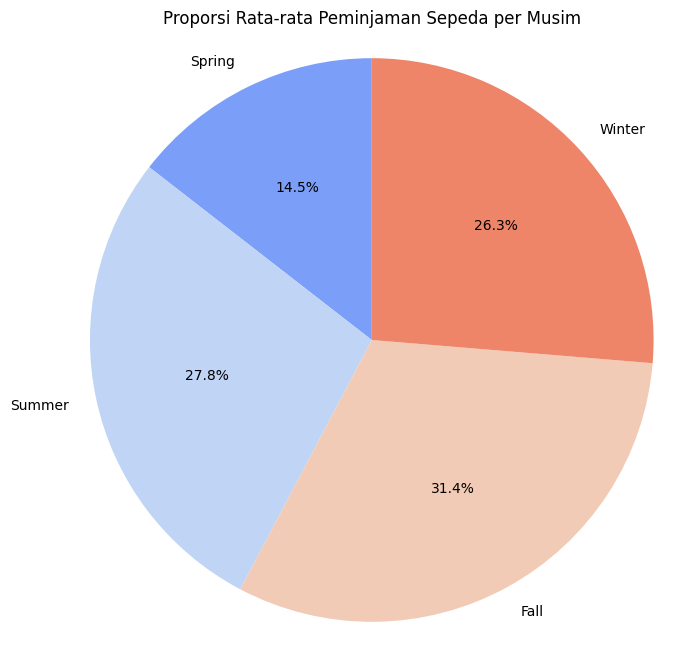

In [39]:
import warnings
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

if day_df['season'].dtype.name == 'category':
    day_df['season'] = day_df['season'].cat.rename_categories({
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })
else:
    day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

grouped_by_season = day_df.groupby('season', observed=False)['cnt'].mean().reset_index()

total_avg_cnt = grouped_by_season['cnt'].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    grouped_by_season['cnt'],
    labels=grouped_by_season['season'],
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    startangle=90,
    colors=sn.color_palette('coolwarm', len(grouped_by_season))
)

plt.title('Proporsi Rata-rata Peminjaman Sepeda per Musim')
plt.axis('equal')
plt.show()

### Pertanyaan 1:

Seberapa baik kinerja pendaftar dalam beberapa bulan terakhir dilihat dari jumlah peminjaman sepeda?

### Pertanyaan 2:

Bagaimana pengaruh musim terhadap frekuensi peminjaman sepeda? Apakah ada musim tertentu yang menunjukkan fluktuasi signifikan, baik peningkatan maupun penurunan?

## Conclusion

- Dari visualisasi yang ditampilkan, kita dapat memahami bagaimana tren peminjaman sepeda bervariasi di sepanjang tahun, dipengaruhi oleh musim yang berbeda. Pada grafik pertama, terlihat adanya peningkatan yang jelas dalam rata-rata peminjaman sepeda dari tahun 2011 ke 2012. Pada awal tahun 2011, jumlah peminjaman dimulai dari angka yang relatif rendah, terutama pada bulan-bulan seperti Januari dan Februari. Namun, seiring berjalannya tahun, terjadi peningkatan yang signifikan, khususnya di musim semi dan musim panas. Pada bulan Juni dan Juli 2011, misalnya, angka peminjaman mencapai puncaknya. Meski demikian, peningkatan yang jauh lebih tajam terlihat pada tahun 2012, dengan jumlah peminjaman yang melampaui angka tertinggi dari tahun sebelumnya di hampir setiap bulan. Hal ini menunjukkan adanya pertumbuhan dalam minat atau mungkin peningkatan akses terhadap layanan peminjaman sepeda, yang pada akhirnya menghasilkan peningkatan angka peminjaman secara keseluruhan pada tahun tersebut. Musim panas dan musim gugur menjadi periode paling aktif, sedangkan akhir tahun, khususnya Desember, memperlihatkan penurunan yang signifikan.

- Pada visualisasi tersebut, distribusi proporsi peminjaman sepeda berdasarkan musim memperlihatkan gambaran yang lebih detail tentang pengaruh musiman terhadap jumlah peminjaman. Musim gugur ternyata menjadi periode dengan jumlah peminjaman tertinggi, menguasai lebih dari 30% dari total peminjaman sepeda. Hal ini mungkin terkait dengan kondisi cuaca yang lebih sejuk dan stabil dibandingkan musim panas, sehingga mendorong lebih banyak orang untuk bersepeda. Di sisi lain, musim panas menyumbang hampir 28% dari total peminjaman, menandakan bahwa banyak aktivitas luar ruangan selama periode ini yang mendorong penggunaan sepeda, meskipun suhu panas mungkin mengurangi minat beberapa pengguna. Menariknya, musim dingin juga memiliki proporsi peminjaman yang cukup besar, mencapai lebih dari seperempat dari total, meskipun cuaca dingin biasanya tidak ideal untuk bersepeda. Hal ini mungkin menunjukkan adanya faktor lain, seperti kebutuhan transportasi sehari-hari, yang tetap mendorong penggunaan sepeda meski dalam kondisi cuaca yang kurang mendukung. Di sisi lain, musim semi hanya menyumbang proporsi kecil dari total peminjaman, meskipun secara umum dianggap sebagai periode awal aktivitas luar ruangan setelah musim dingin. Cuaca yang masih tidak stabil atau kurangnya infrastruktur bersepeda mungkin berperan dalam rendahnya angka peminjaman pada musim ini.